In [1]:
##(1)Face-Frontalization-2 , Kazuo Ohzeki
## input=several images.jpg in img6F; process frontalization by two parameters(r and s);
##  output= frontalized images_r.jpg and images_s.jpg if succeeded in img6Fr and img6Fs
##  Finally, you can download resulted files by zip files
## Prerequisites : google colabratory,  Run-time type =T4GPU
## April 15th 2024
## references:
## Original algorithm by Hassner et al.,
## Tal Hassner Tal Hassner, Shai Harel, Eran Paz, and Roee Enbar, "Effective Face Frontalization in Unconstrained Images”, IEEE CVPR, pp. 4295-4304, June, 2015
## Revised by Douglas Souza, combining python, openCV, and matlab.
## However, this code currently does not work as is.
## So I have improved it this time. According to
## Douglas Souza, Joseph Zhong, Face Frontalization on Feb 19, 2018，
## https://github.com/dougsouza/face-frontalization
## The points I have improved are: python2 to python3. Along with this, the urllib function was changed; Error when dividing into a small number; Fixed bugs that occurred with this fix.
##
## If you use or discuss this Face-Frontalization-2, please cite the papers as follows;
## Kazuo Ohzeki, aki Saito Shiojiri, Koichi Kamijo, and Masami Suzuki, "Improving the Recognition Rate of Facial Expressions and Behavior through Frontalization and Data Augmentation", Proceesings of the International Conference on Computer and Automation Engineering (ICCAE) March 2024.
## and Kazuo Ohzeki, "Face-Frontalization-2", to be published as Proceedings of International Conference of AI new Technology and open Discussion(ICAITD) April 2024

print("Face-Frontalization-2.ipynb")
import datetime, pytz
print(datetime.datetime.now())###.now(pytz.timezone('Asia/Tokyo') ))

Face-Frontalization-2.ipynb
2024-04-17 07:42:13.583753


In [2]:
##(2)upload files and unzip them
##upload file "FF-files.zip" by clicking squared file button on the left, and then click upper arrow button
## or use two-line command below for file upload;
from google.colab import files
f = files.upload() #FF-files.zip file upload

##!unzip FF-files.zip
!unzip FF-files.zip  ##program codes of Face-Frontalization-2
print("dlib_models")
!ls -la dlib_models
!ls -la


Saving FF-files.zip to FF-files.zip
Archive:  FF-files.zip
 extracting: camera_calibration.py   
 extracting: check_resources.py      
 extracting: DataAlign2LFWa.mat      
 extracting: dlib_models/DataAlign2LFWa.mat  
 extracting: dlib_models/eyemask.mat  
 extracting: dlib_models/model3Ddlib.mat  
 extracting: eyemask.mat             
 extracting: face_detector.py        
 extracting: facial_feature_detector.py  
 extracting: frontalize.py           
 extracting: model3Ddlib.mat         
 extracting: test.jpg                
dlib_models
total 1924
drwxr-xr-x 2 root root    4096 Apr 17 07:43 .
drwxr-xr-x 1 root root    4096 Apr 17 07:43 ..
-rw-r--r-- 1 root root     707 Apr 16 12:26 DataAlign2LFWa.mat
-rw-r--r-- 1 root root    1754 Apr 16 12:26 eyemask.mat
-rw-r--r-- 1 root root 1953567 Apr 16 12:26 model3Ddlib.mat
total 5824
drwxr-xr-x 1 root root    4096 Apr 17 07:43 .
drwxr-xr-x 1 root root    4096 Apr 17 07:40 ..
-rw-r--r-- 1 root root    4023 Apr 16 12:52 camera_calibration.py
-r

In [3]:
##(3)
IFDN_txt='img6F'  ##replace by zipped image file directory name for frontalization
## assume image files are in a directory img6F, and zipped as img6F.zip
from google.colab import files
f = files.upload() #You should upload img6F.zip file in any way
## after uploaded
!unzip $IFDN_txt'.zip'  ##input image files for frontalization

cater=IFDN_txt+'r'  ##output_part_r
cates=IFDN_txt+'s'  ##output_part_s
##!mkdir $IFDN_txt
!mkdir $cater  ##output directory
!mkdir $cates  ##output directory
!ls $IFDN_txt |wc -l
!ls -la

Saving img6F.zip to img6F.zip
Archive:  img6F.zip
 extracting: img6F/3_18_KW_Stu_02_c.jpg  
 extracting: img6F/5_10_kw5_1_c.jpg  
 extracting: img6F/10_002_KW12_P1N1_c_c.jpg  
 extracting: img6F/10_024_KW12_P1N1_c.jpg  
 extracting: img6F/10g_kw6_P7_N5_c.jpg  
 extracting: img6F/12_30_P9I_09_French_c.jpg  
 extracting: img6F/13_30_P7g_06_0f26801e302948258bb5c023f217cd6b_c.jpg  
 extracting: img6F/16_kw6_P5_N4_c.jpg  
8
total 6204
drwxr-xr-x 1 root root    4096 Apr 17 07:44 .
drwxr-xr-x 1 root root    4096 Apr 17 07:40 ..
-rw-r--r-- 1 root root    4023 Apr 16 12:52 camera_calibration.py
-rw-r--r-- 1 root root    1861 Apr 16 12:52 check_resources.py
drwxr-xr-x 4 root root    4096 Apr 15 13:25 .config
-rw-r--r-- 1 root root     707 Apr 16 12:51 DataAlign2LFWa.mat
drwxr-xr-x 2 root root    4096 Apr 17 07:43 dlib_models
-rw-r--r-- 1 root root    1754 Apr 16 12:52 eyemask.mat
-rw-r--r-- 1 root root    3140 Apr 16 12:53 face_detector.py
-rw-r--r-- 1 root root    1271 Apr 16 12:53 facial_featu

In [10]:
##(4) upload shape_predictor_68_face_landmarks.dat.bz2 and put it in dlib_models (/content/dlib_models)
##!wget https://sourceforge.net/projects/dclib/files/dlib/v18.10/shape_predictor_68_face_landmarks.dat.bz2/download
!wget    https://phoenixnap.dl.sourceforge.net/project/dclib/dlib/v18.10/shape_predictor_68_face_landmarks.dat.bz2
 ## The size of "shape_predictor_68_face_landmarks.dat.bz2" is 62MB. Please wait here several seconds for getting it. You had better to put it at your google drive.
##Several seconds/minutes later,
!ls -la


--2024-04-17 08:04:28--  https://phoenixnap.dl.sourceforge.net/project/dclib/dlib/v18.10/shape_predictor_68_face_landmarks.dat.bz2
Resolving phoenixnap.dl.sourceforge.net (phoenixnap.dl.sourceforge.net)... 184.164.141.26
Connecting to phoenixnap.dl.sourceforge.net (phoenixnap.dl.sourceforge.net)|184.164.141.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  40.4MB/s    in 1.5s    

2024-04-17 08:04:29 (40.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

total 256368
drwxr-xr-x 1 root root     4096 Apr 17 08:04 .
drwxr-xr-x 1 root root     4096 Apr 17 07:40 ..
-rw-r--r-- 1 root root     4023 Apr 16 12:52 camera_calibration.py
-rw-r--r-- 1 root root     1861 Apr 16 12:52 check_resources.py
drwxr-xr-x 4 root root     4096 Apr 15 13:25 .config
-rw-r--r-- 1 root root      707 Apr 16

In [12]:
##(4b) move "shape_predictor_68_face_landmarks.dat.bz2" to /content/dlib_models
!mv shape_predictor_68_face_landmarks.dat.bz2  dlib_models/
!ls -la dlib_models


total 64464
drwxr-xr-x 2 root root     4096 Apr 17 08:06 .
drwxr-xr-x 1 root root     4096 Apr 17 08:06 ..
-rw-r--r-- 1 root root      707 Apr 16 12:26 DataAlign2LFWa.mat
-rw-r--r-- 1 root root     1754 Apr 16 12:26 eyemask.mat
-rw-r--r-- 1 root root  1953567 Apr 16 12:26 model3Ddlib.mat
-rw-r--r-- 1 root root 64040097 Aug 22  2014 shape_predictor_68_face_landmarks.dat.bz2


Extracting...
Done!
files= ['13_30_P7g_06_0f26801e302948258bb5c023f217cd6b_c.jpg', '16_kw6_P5_N4_c.jpg', '3_18_KW_Stu_02_c.jpg', '5_10_kw5_1_c.jpg', '10g_kw6_P7_N5_c.jpg', '10_002_KW12_P1N1_c_c.jpg', '12_30_P9I_09_French_c.jpg', '10_024_KW12_P1N1_c.jpg']
['13_30_P7g_06_0f26801e302948258bb5c023f217cd6b_c.jpg', '16_kw6_P5_N4_c.jpg', '3_18_KW_Stu_02_c.jpg', '5_10_kw5_1_c.jpg', '10g_kw6_P7_N5_c.jpg', '10_002_KW12_P1N1_c_c.jpg', '12_30_P9I_09_French_c.jpg', '10_024_KW12_P1N1_c.jpg']
i= 0 ;; f=files= 13_30_P7g_06_0f26801e302948258bb5c023f217cd6b_c.jpg
Number of faces detected: 1


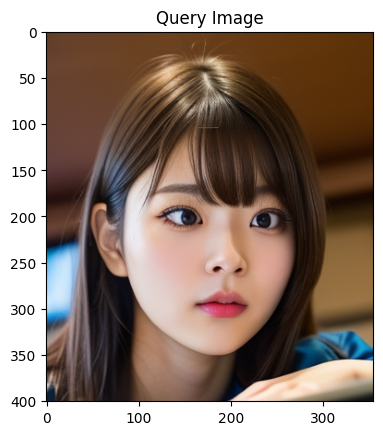

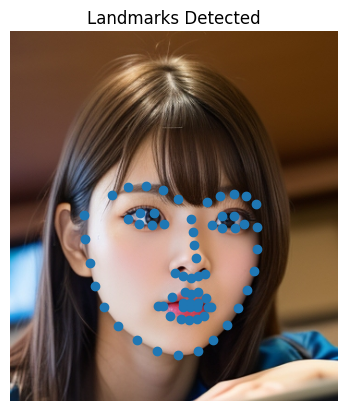

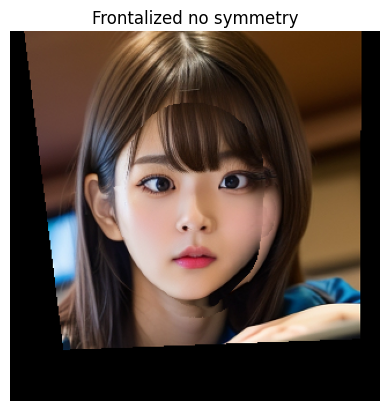

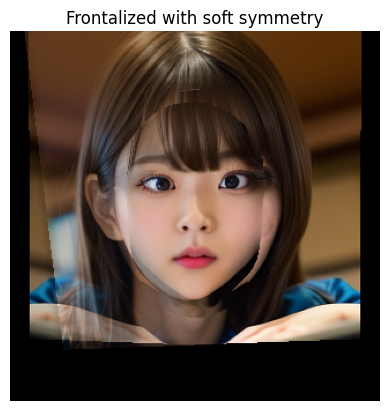

OK:save_resulted_imgs
i= 1 ;; f=files= 16_kw6_P5_N4_c.jpg
Number of faces detected: 1


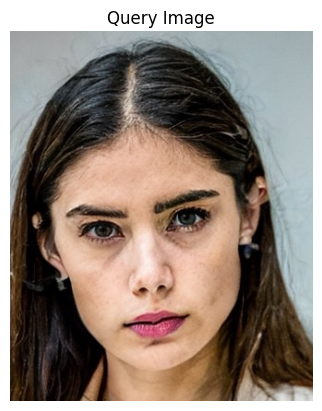

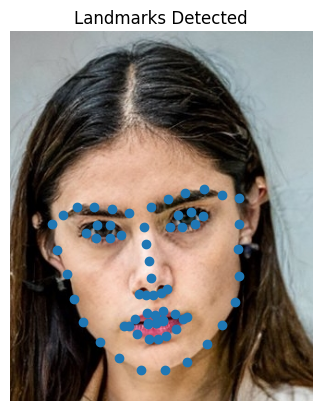

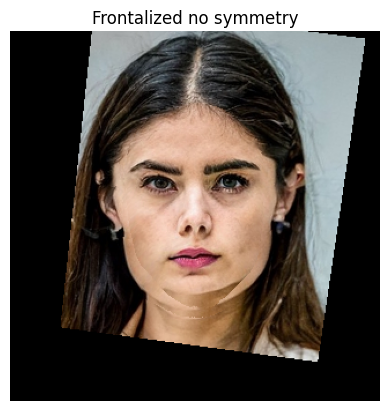

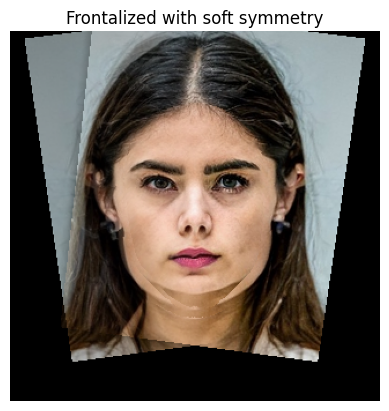

OK:save_resulted_imgs
i= 2 ;; f=files= 3_18_KW_Stu_02_c.jpg
Number of faces detected: 1


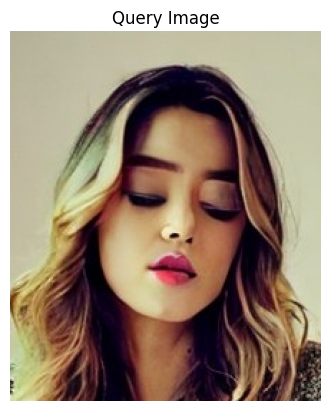

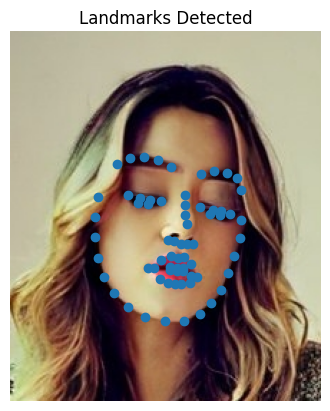

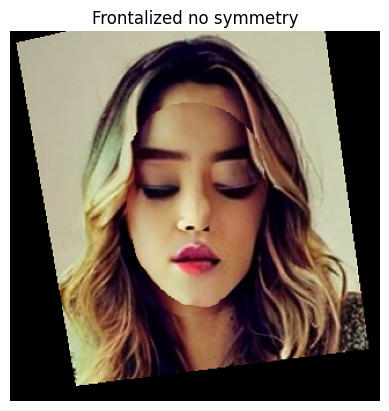

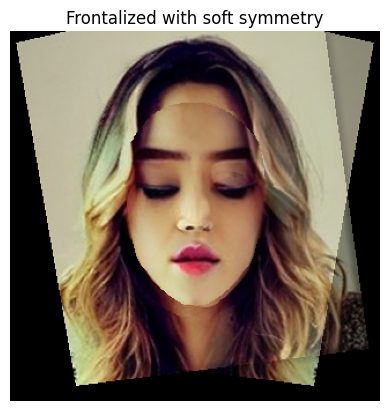

OK:save_resulted_imgs
i= 3 ;; f=files= 5_10_kw5_1_c.jpg
Number of faces detected: 1


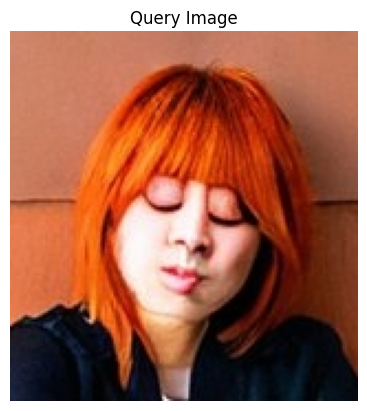

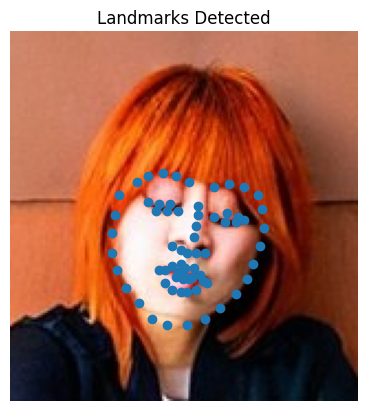

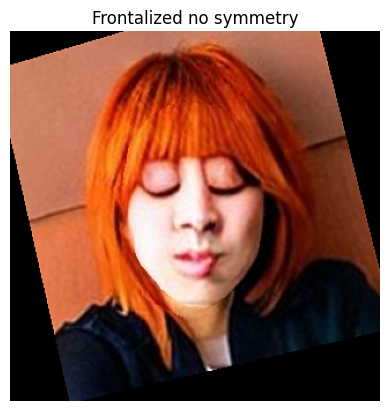

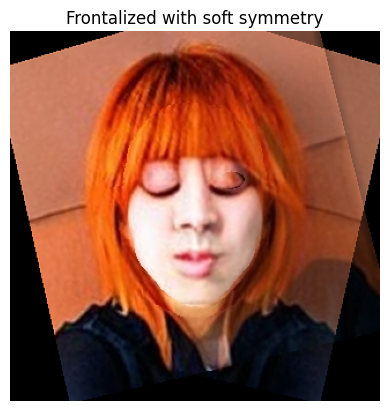

OK:save_resulted_imgs
i= 4 ;; f=files= 10g_kw6_P7_N5_c.jpg
Number of faces detected: 1


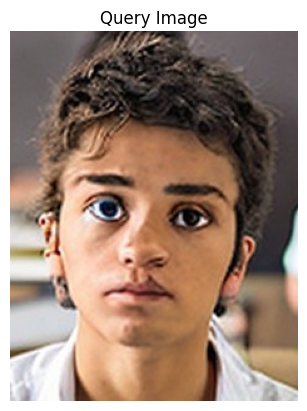

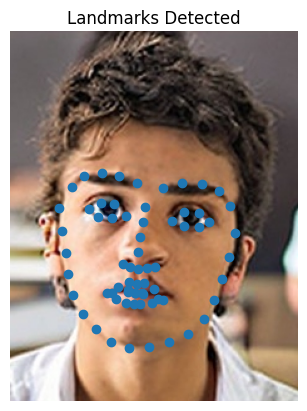

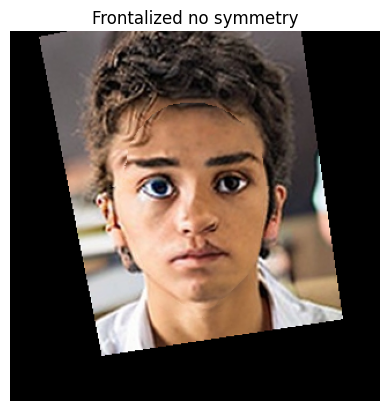

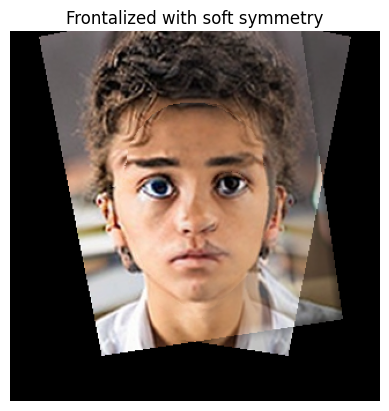

OK:save_resulted_imgs
i= 5 ;; f=files= 10_002_KW12_P1N1_c_c.jpg
Number of faces detected: 1


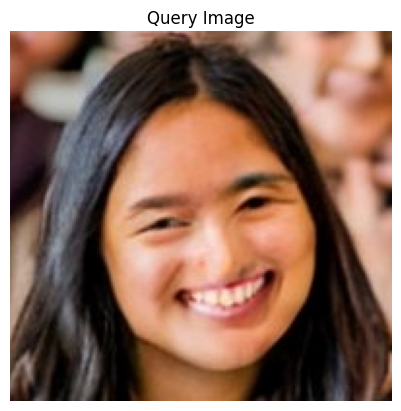

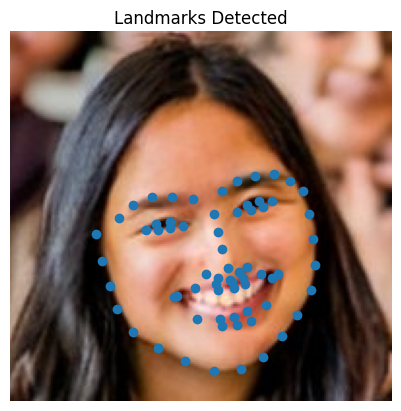

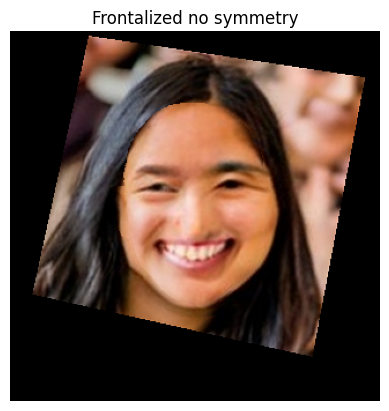

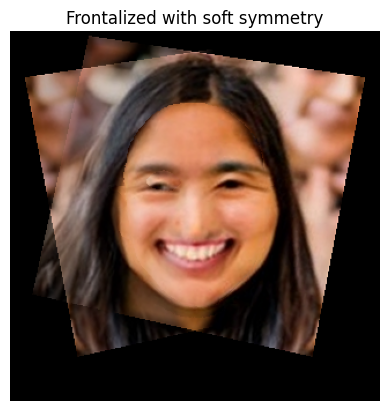

OK:save_resulted_imgs
i= 6 ;; f=files= 12_30_P9I_09_French_c.jpg
Number of faces detected: 1


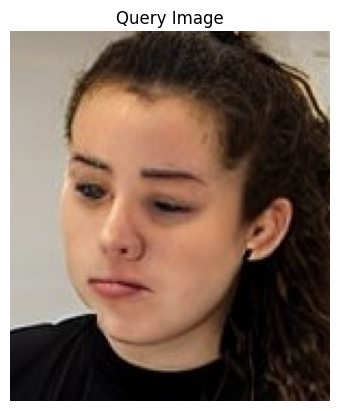

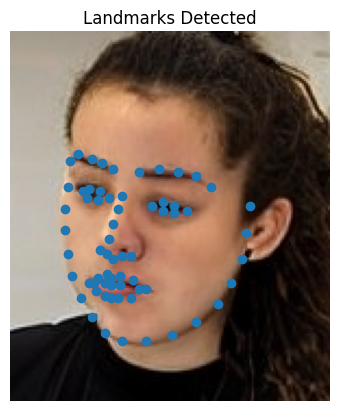

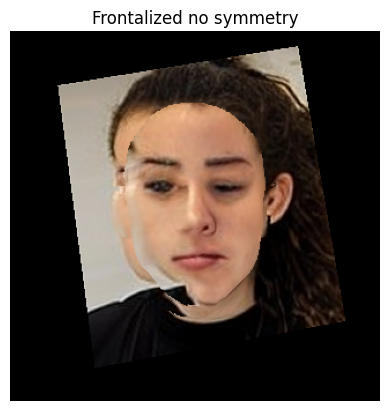

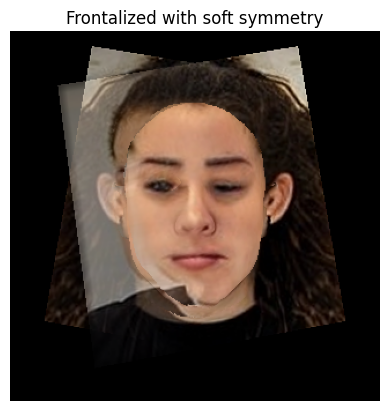

OK:save_resulted_imgs
i= 7 ;; f=files= 10_024_KW12_P1N1_c.jpg
Number of faces detected: 1


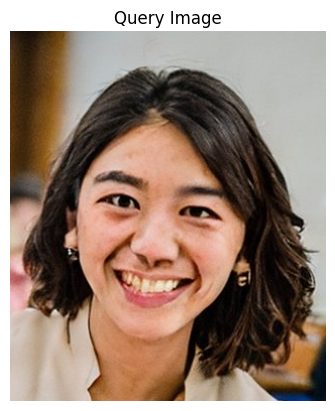

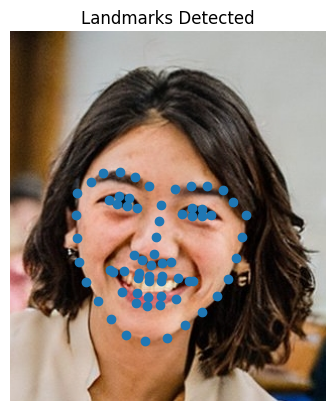

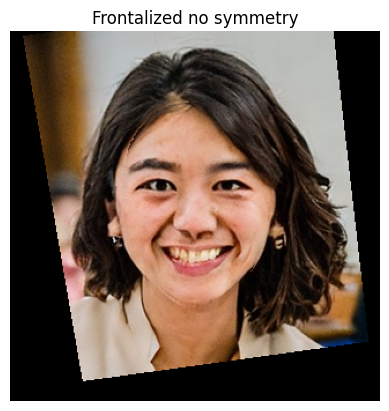

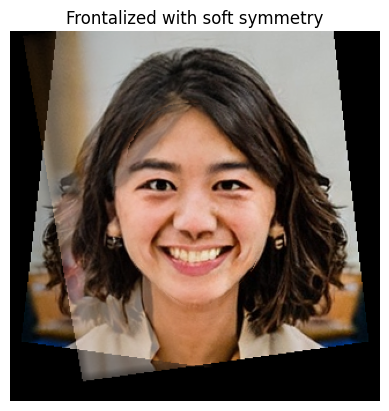

OK:save_resulted_imgs
OKQuery_Landmarks_frontalized_faxe_symmetry-filtered


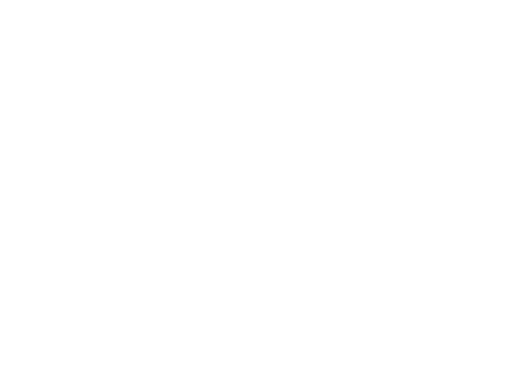

In [13]:
##(5)
import frontalize
import facial_feature_detector as feature_detection
import camera_calibration as calib
import scipy.io as io
import cv2
import numpy as np
import os
import check_resources as check
import matplotlib.pyplot as plt

##this_path="https://github.com/dougsouza/face-frontalization"
this_path = os.path.dirname(os.path.abspath('__file__'))

def demo():
    check.check_dlib_landmark_weights()
    # load detections performed by dlib library on 3D model and Reference Image
    model3D = frontalize.ThreeD_Model("model3Ddlib.mat", 'model_dlib')
    in_img=IFDN_txt ##"img5F"
    files = os.listdir(in_img)
    files_file = [f for f in files if os.path.isfile(os.path.join(in_img, f))]
    print("files=",files)
    print(files_file)   # ['file1', 'file2.txt', 'file3.jpg']
    i=0
    for f in os.listdir(in_img):### files:
      print("i=",i,";; f=files=",f)
      i=i+1
      img=cv2.imread(in_img+'/'+f)
      plt.title('Query Image')
      plt.imshow(img[:, :, ::-1])

      lmarks = feature_detection.get_landmarks(img)

      plt.figure()
      plt.title('Landmarks Detected')
      plt.imshow(img[:, :, ::-1])
      ##err_proc##plt.scatter(lmarks[0][:, 0], lmarks[0][:, 1])
      try:
        plt.scatter(lmarks[0][:, 0], lmarks[0][:, 1])
      except Exception:
        print("plt.scatter(lmark err","i-1=",i-1," ; ", f," is skipped by continue文" )
        continue ##skiped by continue
      plt.axis('off')
      im_rgb2 = cv2.cvtColor(img[:, :, ::-1], cv2.COLOR_BGR2RGB)

      proj_matrix, camera_matrix, rmat, tvec = calib.estimate_camera(model3D, lmarks[0])
      eyemask = np.asarray(io.loadmat('eyemask.mat')['eyemask'])
      # perform frontalization
      frontal_raw, frontal_sym = frontalize.frontalize(img, proj_matrix, model3D.ref_U, eyemask)
      plt.figure()
      plt.title('Frontalized no symmetry')
      plt.imshow(frontal_raw[:, :, ::-1])

      plt.axis('off')
      im_rgb3 = cv2.cvtColor(frontal_raw[:, :, ::-1], cv2.COLOR_BGR2RGB)
      cv2.imwrite(in_img+'r'+'/'+f+'r.jpg',im_rgb3)

      plt.figure()
      plt.title('Frontalized with soft symmetry')
      plt.imshow(frontal_sym[:, :, ::-1])
      plt.axis('off')
      im_rgb4 = cv2.cvtColor(frontal_sym[:, :, ::-1], cv2.COLOR_BGR2RGB)

      cv2.imwrite(in_img+'s'+'/'+f+'s.jpg',im_rgb4)
      plt.show()
      plt.axis('off')

      print("OK:save_resulted_imgs")

if __name__ == "__main__":
    demo()


print("OKQuery_Landmarks_frontalized_faxe_symmetry-filtered")

In [14]:
##after execution, see result files
!ls $cater | wc -l
!ls $cates | wc -l
!ls -la $cater
!ls -la $cates


8
8
total 268
drwxr-xr-x 2 root root  4096 Apr 17 08:10 .
drwxr-xr-x 1 root root  4096 Apr 17 08:09 ..
-rw-r--r-- 1 root root 26355 Apr 17 08:09 10_002_KW12_P1N1_c_c.jpgr.jpg
-rw-r--r-- 1 root root 37048 Apr 17 08:10 10_024_KW12_P1N1_c.jpgr.jpg
-rw-r--r-- 1 root root 28884 Apr 17 08:09 10g_kw6_P7_N5_c.jpgr.jpg
-rw-r--r-- 1 root root 22170 Apr 17 08:09 12_30_P9I_09_French_c.jpgr.jpg
-rw-r--r-- 1 root root 30369 Apr 17 08:09 13_30_P7g_06_0f26801e302948258bb5c023f217cd6b_c.jpgr.jpg
-rw-r--r-- 1 root root 34505 Apr 17 08:09 16_kw6_P5_N4_c.jpgr.jpg
-rw-r--r-- 1 root root 34529 Apr 17 08:09 3_18_KW_Stu_02_c.jpgr.jpg
-rw-r--r-- 1 root root 30318 Apr 17 08:09 5_10_kw5_1_c.jpgr.jpg
total 268
drwxr-xr-x 2 root root  4096 Apr 17 08:10 .
drwxr-xr-x 1 root root  4096 Apr 17 08:09 ..
-rw-r--r-- 1 root root 27192 Apr 17 08:09 10_002_KW12_P1N1_c_c.jpgs.jpg
-rw-r--r-- 1 root root 37493 Apr 17 08:10 10_024_KW12_P1N1_c.jpgs.jpg
-rw-r--r-- 1 root root 29812 Apr 17 08:09 10g_kw6_P7_N5_c.jpgs.jpg
-rw-r--r--

In [15]:
##zip results
!zip -r /content/$cater'.zip' /content/$cater
!zip -r /content/$cates'.zip' /content/$cates
!ls -la

  adding: content/img6Fr/ (stored 0%)
  adding: content/img6Fr/10_002_KW12_P1N1_c_c.jpgr.jpg (deflated 2%)
  adding: content/img6Fr/12_30_P9I_09_French_c.jpgr.jpg (deflated 3%)
  adding: content/img6Fr/3_18_KW_Stu_02_c.jpgr.jpg (deflated 1%)
  adding: content/img6Fr/5_10_kw5_1_c.jpgr.jpg (deflated 1%)
  adding: content/img6Fr/16_kw6_P5_N4_c.jpgr.jpg (deflated 1%)
  adding: content/img6Fr/13_30_P7g_06_0f26801e302948258bb5c023f217cd6b_c.jpgr.jpg (deflated 1%)
  adding: content/img6Fr/10g_kw6_P7_N5_c.jpgr.jpg (deflated 2%)
  adding: content/img6Fr/10_024_KW12_P1N1_c.jpgr.jpg (deflated 1%)
  adding: content/img6Fs/ (stored 0%)
  adding: content/img6Fs/13_30_P7g_06_0f26801e302948258bb5c023f217cd6b_c.jpgs.jpg (deflated 1%)
  adding: content/img6Fs/5_10_kw5_1_c.jpgs.jpg (deflated 1%)
  adding: content/img6Fs/3_18_KW_Stu_02_c.jpgs.jpg (deflated 1%)
  adding: content/img6Fs/10_024_KW12_P1N1_c.jpgs.jpg (deflated 1%)
  adding: content/img6Fs/12_30_P9I_09_French_c.jpgs.jpg (deflated 2%)
  adding: 

In [16]:
##download result_part_r
from google.colab import files
cater2=cater+'.zip'
!echo $cater2
files.download(cater2) ###'/content/$cater'.zip'')

img6Fr.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
###download result part_s
from google.colab import files
cates2=cates+'.zip'
!echo $cates2
files.download(cates2)

img6Fs.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>